The Goal of this project is to take data from every week of the billboard Top 100 from 1957-2021 and all of those songs coresponding song information as given by the Spotify Web API, and combine the data. From there I plan to clean the data up, getting rid of duplicates and NAs to have workable data. I will then split the data up into 3 tables, the first containing the Hot 100 data with a song being represented by its song_week_ID and songID, the second being a table containing every songs IDs information such as artist and genre, and a third table containing the spotify API data for every song. I then plan to use those 3 tables to explore trends over decades and discover other historical data such as the top artist or the top songs during a certain time period using SQL and other python libraries.

#Downloading Data and Checking

In [2]:
import pandas as pd

In [ ]:
#hotAudio contains all song information for every song in the hot database, obtained using the spotify WebAPI
hotAudio = pd.read_excel('https://query.data.world/s/lwuble5ivkp2qrvuzay56ssa7qjptf?dws=00000')

In [ ]:
#hot contains the top 100 songs from every week on the billboard Hot 100 since 1957
hot = pd.read_csv('https://query.data.world/s/brp7wpuq25dqg5yjfp4ohwtsjgxose?dws=00000')

In [ ]:
#Shows me that there is 29,000 rows and 22 columns, meaning 29,000 songs represented
hotAudio.shape

In [ ]:
#This shows me that some songs do not have spotify track data associated with them which means I will need to drop those in order to find trends
#Also shows me the format is which the songID is created, a combination of the song and artist in a string
hotAudio.head()

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,0.0,The Essential Andy Williams,0.154,...,-14.063,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0
3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,0.0,Compelling Percussion,0.588,...,-17.278,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0
4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,0.0,...Baby One More Time (Digital Deluxe Version),0.759,...,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0


In [ ]:
#I'm missing 15,000 preview url data points, but I dont really care about the url so I will get rid of
#that column before dropping clolumns in order to keep some that might still be useful to me but are missing the preview URL
#A lot of columns are missing 5169 entries meaning if one song is missing energy its also missing mode, loudness, key etc.
hotAudio.isna().sum()

SongID                           0
Performer                        0
Song                             0
spotify_genre                 1600
spotify_track_id              5106
spotify_track_preview_url    15012
spotify_track_duration_ms     5106
spotify_track_explicit        5106
spotify_track_album           5112
danceability                  5169
energy                        5169
key                           5169
loudness                      5169
mode                          5169
speechiness                   5169
acousticness                  5169
instrumentalness              5169
liveness                      5169
valence                       5169
tempo                         5169
time_signature                5169
spotify_track_popularity      5106
dtype: int64

In [ ]:
#Seeing how many totl entires are in my data. 327,000 rows which
#is a lot of entries but makes sense considering the time it spans
hot.shape

(327895, 10)

In [ ]:
#This search shows me that weekID associated with each entry which I can use to classify by week and group by year later on. Will most likely need to convert to datetime to use
#This dataset has the songID as well which I can use to link the two columns
#Also contains other data that might be interesting to mess with such as weeks on chart
hot.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8


In [ ]:
#Cheking how many NA values. Just in the previous week position which makes sense for new entries
#to the Hot 100. I dont need to Previous Week Position infomation for my aggregation so I can remove
#the column later before NAs in order to not get rid of 32,000 songs data that I could use otherwise
hot.isna().sum()

url                           0
WeekID                        0
Week Position                 0
Song                          0
Performer                     0
SongID                        0
Instance                      0
Previous Week Position    31954
Peak Position                 0
Weeks on Chart                0
dtype: int64

#Using Spotify API to gather Spotify Data on every Song

In [ ]:
import requests

AUTH_URL = "https://accounts.spotify.com/api/token"
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': '',
    'client_secret': '',
})

#Convert response to JSON
auth_response_data = auth_response.json()

#Save the access token
access_token = auth_response_data['access_token']

#Need to pass access token into header to send properly formed GET request to API server
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

#This is a search query that returns all instances of this song
BASE_URL = 'https://api.spotify.com/v1/'

In [ ]:
songInfo = hot.drop_duplicates("Song")
songInfo = songInfo[['Song', 'Performer']]
songInfo.reset_index(drop=True)

,Song,Performer
0,Don't Just Stand There,Patty Duke
1,Don't Keep Wasting My Time,Teddy Pendergrass
2,Don't Knock My Love - Pt. 1,Wilson Pickett
3,Don't Knock My Love,Diana Ross & Marvin Gaye
4,Don't Know Much,Bill Medley
...,...,...
24355,You Let Your Heart Go Too Fast,Spin Doctors
24356,You Lied To Me,Cathy Dennis
24357,You Lied To Your Daddy,The Tams
24358,You Lie,The Band Perry


In [ ]:
SpotifyAudioFeatures = pd.DataFrame()

In [ ]:
for songIndex in range(len(songInfo)):
  artist = songInfo.iloc[songIndex]['Performer']
  artistWords = artist.split(" ")
  artistQuery = ''
  for word in artistWords:
    artistQuery += word + "%20"

  song = songInfo.iloc[songIndex]['Song']
  songWords = song.split(" ")
  songQuery = songWords[0]
  for word in songWords[1:]:
    songQuery += '%20' + word

  r = requests.get(BASE_URL + 'search?q=' + artistQuery + songQuery + '&type=track', headers=headers)
  r = r.json()

  r2 = requests.get(BASE_URL + 'audio-features?ids=' + r["tracks"]["items"][0]["id"], headers=headers)
  r2 = r2.json()

  hotAudio = pd.json_normalize(r2['audio_features'])
  songID =  r['tracks']['items'][0]["name"] + r['tracks']['items'][0]["artists"][0]['name']
  #hotAudio = hotAudio.assign(Artist = r['tracks']['items'][0]["artists"][0]['name'])
  #hotAudio = hotAudio.assign(Song = r['tracks']['items'][0]["name"])
  hotAudio = hotAudio.assign(SongID = songID)
  SpotifyAudioFeatures = pd.concat([SpotifyAudioFeatures, hotAudio])

In [ ]:
SpotifyAudioFeatures.reset_index(drop=True)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,SongID
0,0.554,0.375,7,-6.979,1,0.0266,0.849,0.000003,0.3860,0.513,83.293,audio_features,5takJXnMRsp38BWcPr5a2z,spotify:track:5takJXnMRsp38BWcPr5a2z,https://api.spotify.com/v1/tracks/5takJXnMRsp3...,https://api.spotify.com/v1/audio-analysis/5tak...,158760,3,Don't Just Stand TherePatty Duke
1,0.614,0.405,4,-12.386,0,0.0376,0.490,0.000132,0.3480,0.645,118.529,audio_features,47nJdvSobIGBYdN7y2caLM,spotify:track:47nJdvSobIGBYdN7y2caLM,https://api.spotify.com/v1/tracks/47nJdvSobIGB...,https://api.spotify.com/v1/audio-analysis/47nJ...,354627,4,Turn off the LightsTeddy Pendergrass
2,0.731,0.518,7,-14.753,0,0.0293,0.445,0.000000,0.0884,0.954,107.669,audio_features,1JkLbghZLWT1rRVsJANORc,spotify:track:1JkLbghZLWT1rRVsJANORc,https://api.spotify.com/v1/tracks/1JkLbghZLWT1...,https://api.spotify.com/v1/audio-analysis/1JkL...,136293,4,"Don't Knock My Love, Pt. 1 - 2006 Remaster; Si..."
3,0.720,0.828,5,-9.211,1,0.0462,0.185,0.429000,0.0839,0.768,110.071,audio_features,3SnGymj6ijE2iuUfWxLo1q,spotify:track:3SnGymj6ijE2iuUfWxLo1q,https://api.spotify.com/v1/tracks/3SnGymj6ijE2...,https://api.spotify.com/v1/audio-analysis/3SnG...,323347,4,I'm Coming OutDiana Ross
4,0.663,0.784,6,-11.245,0,0.0438,0.125,0.003480,0.2140,0.505,108.492,audio_features,2JCTiiJQFWQNC0Zp8rsJRB,spotify:track:2JCTiiJQFWQNC0Zp8rsJRB,https://api.spotify.com/v1/tracks/2JCTiiJQFWQN...,https://api.spotify.com/v1/audio-analysis/2JCT...,289067,4,(I've Had) The Time Of My LifeBill Medley


#Merging Data and Cleaning NAs and repeated columns

In [ ]:
#Creates a new table called hot100 with every hot100 song from all weeks, with its coresponding spotify data
#Joined hotAudio to the hot table because some songs are repeated in the hot table so the Audio features need to be added to each of those entires
hot100 = hot.merge(SpotifyAudioFeatures, left_on = 'SongID', right_on = 'SongID', how = 'left')

In [ ]:
#checking it merged correctly
#I can tell it merged correctly because Dont Just stand there
#by Patty Duke has the same instrumentalness every week,
#meaning that the Audio features correctly applied itself to repeated entries
hot100

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,...,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,...,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,...,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,...,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,...,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330456,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13,...,-5.934,1.0,0.0558,0.0233,0.000060,0.2370,0.268,145.031,4.0,62.0
330457,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13,...,-19.981,1.0,0.0314,0.8350,0.030000,0.0928,0.675,130.864,4.0,51.0
330458,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330459,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13,...,-12.238,0.0,0.0364,0.3180,0.000084,0.0673,0.846,94.558,4.0,52.0


In [ ]:
#Checking total number of rows, now 330,000 rows so somehow added 3,000 rows.
#These will most likely be shown as NA values or duplicated entries which we will deal with later
#Columns make sense tho because there was 22 and 10 columns in the two tables
#and the tables shared SongID meaning they combined SongID leaving 31 columns
hot100.shape

(330461, 31)

In [ ]:
#Preview URL and Previous week both have a ton on NAs
#Since I dont care about those columns I will drop them to attempt to keep more of my data
hot100.isna().sum()

url                               0
WeekID                            0
Week Position                     0
Song_x                            0
Performer_x                       0
SongID                            0
Instance                          0
Previous Week Position        32181
Peak Position                     0
Weeks on Chart                    0
Performer_y                      78
Song_y                           78
spotify_genre                 14586
spotify_track_id              43337
spotify_track_preview_url    160508
spotify_track_duration_ms     43337
spotify_track_explicit        43337
spotify_track_album           43399
danceability                  43895
energy                        43895
key                           43895
loudness                      43895
mode                          43895
speechiness                   43895
acousticness                  43895
instrumentalness              43895
liveness                      43895
valence                     

In [ ]:
#dropping 5 columns that I dont care about before dropping NA's in an attempt to not drop as many rows of data because of columns that I dont need
#We already have performer and song from the hot table so I dont need those. I also cant use the album to aggregate later so not needed
hot100_dropped = hot100.drop(columns=['spotify_track_preview_url', 'spotify_track_album', 'Previous Week Position', 'Performer_y', 'Song_y'])

In [ ]:
#Most of our data that is NA has the same number of NA values so its most likely from the same rows
hot100_dropped.isna().sum()

url                              0
WeekID                           0
Week Position                    0
Song_x                           0
Performer_x                      0
SongID                           0
Instance                         0
Peak Position                    0
Weeks on Chart                   0
spotify_genre                14586
spotify_track_id             43337
spotify_track_duration_ms    43337
spotify_track_explicit       43337
danceability                 43895
energy                       43895
key                          43895
loudness                     43895
mode                         43895
speechiness                  43895
acousticness                 43895
instrumentalness             43895
liveness                     43895
valence                      43895
tempo                        43895
time_signature               43895
spotify_track_popularity     43337
dtype: int64

In [ ]:
#Dropping NA values
hot100_clean = hot100_dropped.dropna()

In [ ]:
hot100_clean.isna().sum()

url                          0
WeekID                       0
Week Position                0
Song_x                       0
Performer_x                  0
SongID                       0
Instance                     0
Peak Position                0
Weeks on Chart               0
spotify_genre                0
spotify_track_id             0
spotify_track_duration_ms    0
spotify_track_explicit       0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
time_signature               0
spotify_track_popularity     0
dtype: int64

In [ ]:
#Reanming columns, specifically those with spaces to make transformations and SQL easier
hot100_clean = hot100_clean.rename(columns = {'Song_x' : 'Song', 'Performer_x' : 'Performer', 'Week Position' : 'Week_Position', 'Peak Position' : 'Peak_Position', 'Weeks on Chart' : 'Weeks_on_Chart'})


In [ ]:
#When creating the hot100 database in AWS I need a primary key. A lot of songs repeated on the charts week to week,
#but no song is on the charts more than once in a given week so I created a unique ID based on everysongs ID and week it was on the charts
hot100_clean['weekstr'] = hot100_clean['WeekID'].str.replace('/', '')

#Needed to factorize because the ID's were words and not numbers
hot100_clean['SongKey'] = pd.factorize(hot100_clean['SongID'])[0].astype(str)

#Creating a key based on the week and songkey
hot100_clean['song_week_key'] = hot100_clean['weekstr'] + hot100_clean['SongKey']

#Dropping unnecessary
hot100_clean = hot100_clean.drop(columns = ['weekstr', 'SongKey'])

#Dropping any songs that may have been on the Hot 100 more than once in a week, which is an error
hot100_clean = hot100_clean.drop_duplicates('song_week_key')

#Converted to datetime after creating the key
hot100_clean['WeekID'] = pd.to_datetime(hot100_clean['WeekID'])

#Creating new tables

In [ ]:
#Data is too large to put into AWS table in a reasonable amount of time I'm limiting to only the top 5 from every week

hot5 = hot100_clean[hot100_clean['Week_Position'] <= 5]

In [ ]:
#Now only 14,000 rows so it will be easier to work with and upload to AWS
#but still gives me a good representation of the Hot 100
hot5.shape

(14520, 27)

In [ ]:
#Converting datatypes
hot5['Song'] = hot5['Song'].astype(str)
hot5['Performer'] = hot5['Performer'].astype(str)
hot5['SongID'] = hot5['SongID'].astype(str)
hot5['spotify_genre'] = hot5['spotify_genre'].astype(str)
hot5['spotify_track_id'] = hot5['spotify_track_id'].astype(str)

In [ ]:
#Creating 3 tables from the hot5 table. The first table is chart which contains the weekly data of every song
#The second table, songs, contains all song information based on the songID
#The third table contains all spotify song data for each song based on songID
chart = hot5[['song_week_key', 'url', 'WeekID', 'SongID', 'Week_Position', 'Peak_Position', 'Weeks_on_Chart']]
songs = hot5[['Song', 'Performer', 'SongID', 'spotify_genre']]
songs = songs.drop_duplicates('SongID')
spotifyInfo = hot5.drop(columns=['song_week_key', 'url', 'WeekID', 'Week_Position', 'Peak_Position', 'Weeks_on_Chart', 'Song', 'Performer', 'Instance', 'spotify_genre'])
spotifyInfo = spotifyInfo.drop_duplicates('SongID')

#AWS and SQL Functions

In [ ]:
import psycopg2
def get_conn_cur():

  conn = psycopg2.connect(  
    host="",
    database="",
    user="",
    password="",
    port='')

  cur = conn.cursor()
  return(conn, cur)

 # run_query function
def run_query(query_string):

 conn, cur = get_conn_cur() # get connection and cursor

 cur.execute(query_string) # executing string as before

 my_data = cur.fetchall() # fetch query data as before

 # here we're extracting the 0th element for each item in cur.description
 colnames = [desc[0] for desc in cur.description]

 cur.close() # close
 conn.close() # close

 return(colnames, my_data) # return column names AND data

# Column name function for checking out what's in a table
def get_column_names(table_name): # arguement of table_name
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 column_name_query = """SELECT column_name FROM information_schema.columns
    WHERE table_name = '%s' """ %table_name

 cur.execute(column_name_query) # exectue
 my_data = cur.fetchall() # store

 cur.close() # close
 conn.close() # close

 return(my_data) # return

# Check table_names
def get_table_names():
 conn, cur = get_conn_cur() # get connection and cursor

 # query to get table names
 table_name_query = """SELECT table_name FROM information_schema.tables """

 cur.execute(table_name_query) # execute
 my_data = cur.fetchall() # fetch results

 cur.close() #close cursor
 conn.close() # close connection

 return(my_data) # return your fetched results

# make sql_head function
def sql_head(table_name):
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 head_query = """SELECT * FROM %s LIMIT 5; """ %table_name

 cur.execute(head_query) # exectue
 colnames = [desc[0] for desc in cur.description] # get column names
 my_data = cur.fetchall() # store first five rows

 cur.close() # close
 conn.close() # close

 df = pd.DataFrame(data = my_data, columns = colnames) # make into df

 return(df) # return

# put functions here and run

# Same run_query function
def run_query(query_string):

  conn, cur = get_conn_cur() # get connection and cursor

  cur.execute(query_string) # executing string as before

  my_data = cur.fetchall() # fetch query data as before

  # here we're extracting the 0th element for each item in cur.description
  colnames = [desc[0] for desc in cur.description]

  cur.close() # close
  conn.close() # close

  return(colnames, my_data) # return column names AND data

# Column name function for checking out what's in a table
def get_column_names(table_name): # arguement of table_name
  conn, cur = get_conn_cur() # get connection and cursor

  # Now select column names while inserting the table name into the WERE
  column_name_query =  """SELECT column_name FROM information_schema.columns
       WHERE table_name = '%s' """ %table_name

  cur.execute(column_name_query) # exectue
  my_data = cur.fetchall() # store

  cur.close() # close
  conn.close() # close

  return(my_data) # return

# Check table_names
def get_table_names():
  conn, cur = get_conn_cur() # get connection and cursor

  # query to get table names
  table_name_query = """SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public' """

  cur.execute(table_name_query) # execute
  my_data = cur.fetchall() # fetch results

  cur.close() #close cursor
  conn.close() # close connection

  return(my_data) # return your fetched results

def sql_head (table_name):
  conn, cur = get_conn_cur() # get connection and cursor

  cur.execute("""SELECT * FROM %s LIMIT 5; """ %table_name)

  my_data = cur.fetchall() # fetch query data as before

  # here we're extracting the 0th element for each item in cur.description
  colnames = [desc[0] for desc in cur.description]

  cur.close() # close
  conn.close() # close

  head_df = pd.DataFrame(my_data, columns=colnames) #turn list into panda dataframe

  return(head_df) # return column names AND data

In [ ]:
# Drop table
# *** Only run this code if you've already created your table and want to delete it to start from scratch again.
#
conn, cur = get_conn_cur()
table_name = ' ' # what table to drop
drop_table_statement = "DROP TABLE %s;"%table_name # make your statement
cur.execute(drop_table_statement) # execute it
conn.commit()
cur.close() # close your cursor

#Uploading 3 Dataframes into AWS

In [ ]:
#Create the hot 5 table
tq = """CREATE TABLE hot5 (
     song_week_key VARCHAR(255) PRIMARY KEY,
     SongID VARCHAR(255) NOT NULL,
     WeekID timestamp NOT NULL,
     url VARCHAR(255) NOT NULL,
     Week_Position BIGINT NOT NULL,
     Peak_Position BIGINT NOT NULL,
     Weeks_on_Chart BIGINT NOT NULL
     );"""

# Get our connection and cursor and assign to conn and cur
conn, cur = get_conn_cur()

# execute our query we wrote above
cur.execute(tq)

# commit
conn.commit()

In [ ]:
# make column order match AWS table
chart = chart[['song_week_key', 'SongID', 'WeekID', 'url', 'Week_Position', 'Peak_Position', 'Weeks_on_Chart']]

import numpy as np
#Insert the data into a touple so it can be inserted into the table
chart_np = chart.to_numpy();
chart_np[:,1] = np.vectorize(lambda x: str(x))(chart_np[:,1])
chart_tups = [tuple(x) for x in chart_np]

In [ ]:
#Insert data string
iq = """INSERT INTO hot5(song_week_key,SongID,WeekID,url,Week_Position,Peak_Position,Weeks_on_Chart) VALUES(%s, %s, %s, %s, %s, %s, %s);"""

In [ ]:
# Upload data
conn, cur = get_conn_cur()
cur.executemany(iq, chart_tups)
conn.commit()
conn.close()

In [ ]:
tq = """CREATE TABLE songs (
     SongID VARCHAR(255) PRIMARY KEY,
     Song VARCHAR(255) NOT NULL,
     Performer VARCHAR(255) NOT NULL,
     spotify_genre VARCHAR(400) NOT NULL
     );"""

# Get our connection and cursor and assign to conn and cur
conn, cur = get_conn_cur()

# execute our query we wrote above
cur.execute(tq)

# commit
conn.commit()

In [ ]:
# make column order match AWS table
songs = songs[['SongID', 'Song', 'Performer', 'spotify_genre']]

songs_np = songs.to_numpy();
songs_tups = [tuple(x) for x in songs_np]

iq = """INSERT INTO songs(SongID,Song,Performer,spotify_genre) VALUES(%s, %s, %s, %s);"""

# Upload data
conn, cur = get_conn_cur()
cur.executemany(iq, songs_tups)
conn.commit()
conn.close()

In [ ]:
spotifyInfo.dtypes

SongID                        object
spotify_track_id              object
spotify_track_duration_ms    float64
spotify_track_explicit       float64
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                         float64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature               float64
spotify_track_popularity     float64
dtype: object

In [ ]:
tq = """CREATE TABLE spotifyInfo (
     SongID VARCHAR(255) PRIMARY KEY,
     spotify_track_id VARCHAR(255) NOT NULL,
     spotify_track_duration_ms FLOAT(24) NOT NULL,
     spotify_track_explicit FLOAT(24) NOT NULL,
     danceability FLOAT(24) NOT NULL,
     energy FLOAT(24) NOT NULL,
     key FLOAT(24) NOT NULL,
     loudness FLOAT(24) NOT NULL,
     mode FLOAT(24) NOT NULL,
     speechiness FLOAT(24) NOT NULL,
     acousticness FLOAT(24) NOT NULL,
     instrumentalness FLOAT(24) NOT NULL,
     liveness FLOAT(24) NOT NULL,
     valence FLOAT(24) NOT NULL,
     tempo FLOAT(24) NOT NULL,
     time_signature FLOAT(24) NOT NULL,
     spotify_track_popularity FLOAT(24) NOT NULL
     );"""

# Get our connection and cursor and assign to conn and cur
conn, cur = get_conn_cur()

# execute our query we wrote above
cur.execute(tq)

# commit
conn.commit()

In [ ]:
# make column order match AWS table
spotifyInfo = spotifyInfo[['SongID', 'spotify_track_id', 'spotify_track_duration_ms',
       'spotify_track_explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'spotify_track_popularity']]

spotifyInfo_np = spotifyInfo.to_numpy();
spotifyInfo_tups = [tuple(x) for x in spotifyInfo_np]

iq = """INSERT INTO spotifyInfo(SongID,spotify_track_id,spotify_track_duration_ms,
       spotify_track_explicit,danceability,energy,key,loudness,
       mode,speechiness,acousticness,instrumentalness,liveness,
       valence,tempo,time_signature,spotify_track_popularity) VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"""

# Upload data
conn, cur = get_conn_cur()
cur.executemany(iq, spotifyInfo_tups)
conn.commit()
conn.close()

#SQL Queries

##Average Tempo Query

In [ ]:
get_table_names()

[('hot5',), ('songs',), ('spotifyinfo',)]

In [ ]:
get_column_names('songs')

[('songid',), ('song',), ('performer',), ('spotify_genre',)]

In [ ]:
get_column_names('spotifyinfo')

[('spotify_track_popularity',),
 ('tempo',),
 ('time_signature',),
 ('spotify_track_duration_ms',),
 ('spotify_track_explicit',),
 ('danceability',),
 ('energy',),
 ('key',),
 ('loudness',),
 ('mode',),
 ('speechiness',),
 ('acousticness',),
 ('instrumentalness',),
 ('liveness',),
 ('valence',),
 ('spotify_track_id',),
 ('songid',)]

In [ ]:
#Query gets the average tempo per year
#I used pd.read_sql in order to get it into a pandas dataframe so I can graph it
avgtempo = pd.read_sql("""SELECT date_part('year', hot5.weekid) as year, AVG(spotifyinfo.tempo) as avg_tempo FROM spotifyinfo
        LEFT JOIN hot5 ON spotifyinfo.songid = hot5.songid
        GROUP BY year
        HAVING date_part('year', hot5.weekid) < 2021
        ORDER BY year ASC
        ;""",
        con = psycopg2.connect(
                host="",
                database="",
                user="",
                password="",
                port=''))

### Filter less than 2021 because 2021 only goes until June 1st of 2021 so the average is skewed

<ipython-input-47-829af43c36e2>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avgtempo = pd.read_sql("""SELECT date_part('year', hot5.weekid) as year, AVG(spotifyinfo.tempo) as avg_tempo FROM spotifyinfo


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

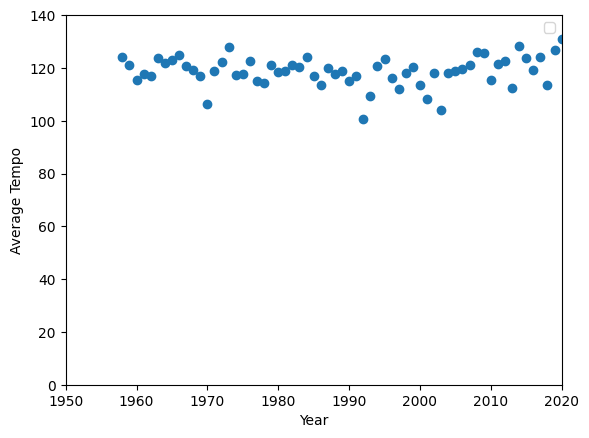

In [ ]:
#Create scatterplot of average tempos over the year
plt.scatter(avgtempo['year'], avgtempo['avg_tempo'])
plt.xlabel('Year')
plt.ylabel('Average Tempo')
plt.xlim(1950, 2020)
plt.ylim(0, 140)
plt.legend()
plt.show()

##Top Songs in 2010 Query

In [ ]:
get_column_names('songs')

[('songid',), ('song',), ('performer',), ('spotify_genre',)]

In [ ]:
get_column_names('hot5')

[('week_position',),
 ('peak_position',),
 ('weeks_on_chart',),
 ('weekid',),
 ('url',),
 ('songid',),
 ('song_week_key',)]

In [ ]:
#Query that gets the number one songs from every week of 2010
songs_2010 = pd.read_sql("""SELECT hot5.weekid as date, songs.song FROM songs
        LEFT JOIN hot5 ON songs.songid = hot5.songid
        WHERE date_part('year', hot5.weekid) = 2010.0
        AND hot5.week_position = 1
        ORDER BY date DESC
        ;""",
        con = psycopg2.connect(
        host="",
        database="",
        user="",
        password="",
        port=''))

<ipython-input-53-397da6a4f78e>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  songs_2010 = pd.read_sql("""SELECT hot5.weekid as date, songs.song FROM songs


In [ ]:
songs_2010

,date,song
0,2010-12-25,Firework
1,2010-12-18,Firework
2,2010-12-11,Raise Your Glass
3,2010-12-04,Only Girl (In The World)
4,2010-11-27,Like A G6
5,2010-11-20,What's My Name?
6,2010-11-13,We R Who We R
7,2010-11-06,Like A G6
8,2010-10-30,Like A G6
9,2010-10-23,Just The Way You Are


##Top 10 Danceable Songs

In [ ]:
get_column_names('spotifyinfo')

[('spotify_track_popularity',),
 ('tempo',),
 ('time_signature',),
 ('spotify_track_duration_ms',),
 ('spotify_track_explicit',),
 ('danceability',),
 ('energy',),
 ('key',),
 ('loudness',),
 ('mode',),
 ('speechiness',),
 ('acousticness',),
 ('instrumentalness',),
 ('liveness',),
 ('valence',),
 ('spotify_track_id',),
 ('songid',)]

In [ ]:
get_column_names('hot5')

[('week_position',),
 ('peak_position',),
 ('weeks_on_chart',),
 ('weekid',),
 ('url',),
 ('songid',),
 ('song_week_key',)]

In [ ]:
#Query that gets the top 5 dancability songs
top_dance = pd.read_sql("""SELECT songs.song, danceability FROM spotifyinfo
        LEFT JOIN songs ON spotifyinfo.songid = songs.songid
        ORDER BY danceability DESC
        LIMIT 10
        ;""",
        con = psycopg2.connect(
        host="",
        database="",
        user="",
        password="",
        port=''))

<ipython-input-57-ba707f8e1242>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_dance = pd.read_sql("""SELECT songs.song, danceability FROM spotifyinfo


In [ ]:
top_dance

,song,danceability
0,Funky Cold Medina,0.988
1,State of Shock,0.980
2,Ice Ice Baby,0.978
3,Give It To Me,0.973
4,SexyBack,0.967
5,Hot In Herre,0.965
6,Anaconda,0.964
7,Girlfriend,0.963
8,Another One Bites The Dust,0.951
9,Temperature,0.951


##Top Energy Songs

In [ ]:
get_column_names('songs')

[('songid',), ('song',), ('performer',), ('spotify_genre',)]

In [ ]:
#Query that gets the songs with the highest energy
top_energy = pd.read_sql("""SELECT songs.song, songs.performer as artist, energy FROM spotifyinfo
        LEFT JOIN songs ON spotifyinfo.songid = songs.songid
        ORDER BY energy DESC
        LIMIT 5
        ;""",
        con = psycopg2.connect(
        host="",
        database="",
        user="",
        password="",
        port=''))

<ipython-input-60-6353d1309cdb>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_energy = pd.read_sql("""SELECT songs.song, songs.performer as artist, energy FROM spotifyinfo


In [ ]:
top_energy

,song,artist,energy
0,We Got The Beat,Go-Go's,0.994
1,When Doves Cry,Prince,0.989
2,Paradise City,Guns N' Roses,0.980
3,Promiscuous,Nelly Furtado Featuring Timbaland,0.977
4,If,Janet Jackson,0.976


##Highest Songs Across 3 Catergories

In [ ]:
get_column_names('spotifyinfo')

[('spotify_track_popularity',),
 ('tempo',),
 ('time_signature',),
 ('spotify_track_duration_ms',),
 ('spotify_track_explicit',),
 ('danceability',),
 ('energy',),
 ('key',),
 ('loudness',),
 ('mode',),
 ('speechiness',),
 ('acousticness',),
 ('instrumentalness',),
 ('liveness',),
 ('valence',),
 ('spotify_track_id',),
 ('songid',)]

In [ ]:
#Based on the last two queries I was curious what songs were the highest across 3 categories
top = pd.read_sql("""SELECT songs.song, songs.performer as artist, energy, danceability,  valence FROM spotifyinfo
        LEFT JOIN songs ON spotifyinfo.songid = songs.songid
        WHERE energy > 0.9
        AND danceability > 0.8
        AND valence > 0.9
        ORDER BY energy DESC
        LIMIT 5
        ;""",
        con = psycopg2.connect(
        host="",
        database="",
        user="",
        password="",
        port=''))

<ipython-input-63-f2cf2bf74fbb>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top = pd.read_sql("""SELECT songs.song, songs.performer as artist, energy, danceability,  valence FROM spotifyinfo


In [ ]:
top

,song,artist,energy,danceability,valence
0,Hot Line,The Sylvers,0.967,0.831,0.966
1,C'mon N' Ride It (The Train),Quad City DJ's,0.959,0.843,0.923
2,Papa Don't Preach,Madonna,0.906,0.807,0.971
3,Get The Party Started,P!nk,0.904,0.802,0.961


##Average Energy Across the Years

In [ ]:
#Query that gets the average energy from every year to see how it has changed over the years
avgEnergy = pd.read_sql("""SELECT date_part('year', hot5.weekid) as year, AVG(spotifyinfo.energy) as avg_energy FROM spotifyinfo
        LEFT JOIN hot5 ON spotifyinfo.songid = hot5.songid
        GROUP BY year
        ORDER BY year ASC
        ;""",
        con = psycopg2.connect(
        host="",
        database="",
        user="",
        password="",
        port=''))


<ipython-input-65-95dc226179a5>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avgEnergy = pd.read_sql("""SELECT date_part('year', hot5.weekid) as year, AVG(spotifyinfo.energy) as avg_energy FROM spotifyinfo


In [ ]:
avgEnergy

,year,avg_energy
0,1958.0,0.463525
1,1959.0,0.477279
2,1960.0,0.439790
3,1961.0,0.506680
4,1962.0,0.510462
...,...,...
59,2017.0,0.657502
60,2018.0,0.627682
61,2019.0,0.555055
62,2020.0,0.673686


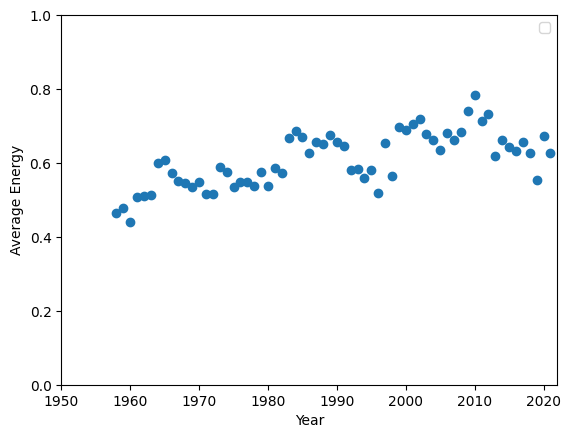

In [ ]:
plt.scatter(avgEnergy['year'], avgEnergy['avg_energy'])
plt.xlabel('Year')
plt.ylabel('Average Energy')
plt.xlim(1950, 2022)
plt.ylim(0, 1)
plt.legend()
plt.show()


## Artists in the Top 5 the Most Times

In [ ]:
get_column_names('hot5')

[('week_position',),
 ('peak_position',),
 ('weeks_on_chart',),
 ('weekid',),
 ('url',),
 ('songid',),
 ('song_week_key',)]

In [ ]:
#Query to find the top artists across the billboard hot 100. Uses the hot5 table in order to get artists
#who may have had songs in the top 5 for more than one week, allowing me to get the total count
TopArtist = pd.read_sql("""SELECT songs.performer, COUNT(hot5.songid) as times_in_top_5 FROM hot5
        LEFT JOIN songs ON hot5.songid = songs.songid
        GROUP BY songs.performer
        ORDER BY times_in_top_5 DESC
        LIMIT 10
        ;""",
        con = psycopg2.connect(
        host="",
        database="",
        user="",
        password="",
        port=''))

<ipython-input-69-f1b19ddf18a2>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  TopArtist = pd.read_sql("""SELECT songs.performer, COUNT(hot5.songid) as times_in_top_5 FROM hot5


In [ ]:
TopArtist.set_index('performer')

,times_in_top_5
performer,
Mariah Carey,154
The Beatles,140
Madonna,136
Bruno Mars,96
Usher,93
Michael Jackson,91
Whitney Houston,85
Taylor Swift,84
The Weeknd,83
